In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import ast
import progressbar
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
actors = pd.read_pickle("./data/actors.pkl")
movies = pd.read_pickle("./data/movies.pkl")

In [3]:
movies

,Wikipedia movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie genres,originalTitle,startYear,IMDb_ID,averageRating,numVotes
0,975900,Ghosts of Mars,2001,14010832.0,98.0,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Ghosts of Mars,2001,tt0228333,4.9,57031
1,28463795,Brun bitter,1988,NaN,83.0,"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",Brun bitter,1988,tt0094806,5.6,42
2,10408933,Alexander's Ragtime Band,1938,3600000.0,106.0,"{'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...",Alexander's Ragtime Band,1938,tt0029852,6.8,2277
3,175026,Sarah and Son,1930,NaN,86.0,"{'/m/07s9rl0': 'Drama', '/m/01g6gs': 'Black-an...",Sarah and Son,1930,tt0021335,5.4,305
4,171005,Henry V,1989,10161099.0,137.0,"{'/m/04xvh5': 'Costume drama', '/m/082gq': 'Wa...",Henry V,1989,tt0097499,7.5,31271
...,...,...,...,...,...,...,...,...,...,...,...
35614,664006,Guilty as Sin,1993,22886222.0,107.0,"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",Guilty as Sin,1993,tt0107057,5.7,5760
35615,24209227,"The Time, the Place and the Girl",1946,NaN,105.0,"{'/m/05p553': 'Comedy film', '/m/02l7c8': 'Rom...","The Time, the Place and the Girl",1946,tt0039038,5.9,347
35617,23851782,The Ghost Train,1941,NaN,82.0,"{'/m/0lsxr': 'Crime Fiction', '/m/01jfsb': 'Th...",The Ghost Train,1941,tt0033660,6.2,1588
35618,34980460,Knuckle,2011,NaN,96.0,"{'/m/03bxz7': 'Biographical film', '/m/07s9rl0...",Knuckle,2011,tt1606259,6.8,3201


In [4]:
actors

Info                                        \
                              ordering Wikipedia movie ID         Movie name   
      IMDb_ID   IMDb_actor_ID                                                  
0     tt0228333 nm0000449            1             975900     Ghosts of Mars   
1     tt0114508 nm0000449            1             689763            Species   
2     tt0120841 nm0000449            1             704406         Species II   
3     tt0129884 nm0000449            1             761361           Dog Park   
4     tt0244196 nm0000449            1             355807        Second Skin   
...                                ...                ...                ...   
27617 tt0120514 nm0000410            1            1191380              Wilde   
27618 tt0100666 nm0056492            1            7761830    Spaced Invaders   
27619 tt0048223 nm0827409            1           28373912          Jan Zizka   
27620 tt1606259 nm4774206            1           34980460            Knuckle   
27621 tt0362411 nm0514648            1            9971909  Another Nice Mess   

                                                                        \
                              Movie release date           primaryName   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449                   2001    Natasha Henstridge   
1     tt0114508 nm0000449                   1995    Natasha Henstridge   
2     tt0120841 nm0000449                   1998    Natasha Henstridge   
3     tt0129884 nm0000449                   1998    Natasha Henstridge   
4     tt0244196 nm0000449                   2000    Natasha Henstridge   
...                                          ...                   ...   
27617 tt0120514 nm0000410                   1997           Stephen Fry   
27618 tt0100666 nm0056492                   1990          Douglas Barr   
27619 tt0048223 nm0827409                   1956       Zdenek Stepánek   
27620 tt1606259 nm4774206                   2011  James Quinn McDonagh   
27621 tt0362411 nm0514648                   1972           Rich Little   

                               Features                                 \
                              birthYear awards nominations movie_count   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449          1974      0           0           5   
1     tt0114508 nm0000449          1974      0           0           1   
2     tt0120841 nm0000449          1974      0           0           3   
3     tt0129884 nm0000449          1974      0           0           3   
4     tt0244196 nm0000449          1974      0           0           4   
...                                 ...    ...         ...         ...   
27617 tt0120514 nm0000410          1957      0           0           1   
27618 tt0100666 nm0056492          1949      0           0           1   
27619 tt0048223 nm0827409          1896      0           0           1   
27620 tt1606259 nm4774206            \N      0           0           1   
27621 tt0362411 nm0514648          1938      0           0           1   

                                                                  \
                              movie_count_genre genres_b4 isMale   
      IMDb_ID   IMDb_actor_ID                                      
0     tt0228333 nm0000449                     3        17      0   
1     tt0114508 nm0000449                     1         2      0   
2     tt0120841 nm0000449                     2         5      0   
3     tt0129884 nm0000449                     2         5      0   
4     tt0244196 nm0000449                     3        10      0   
...                                         ...       ...    ...   
27617 tt0120514 nm0000410                     1         4      1   
27618 tt0100666 nm0056492                     0         1      1   
27619 tt0048223 nm0827409                     0         1   <NA>   
27620 tt1606259 nm47742

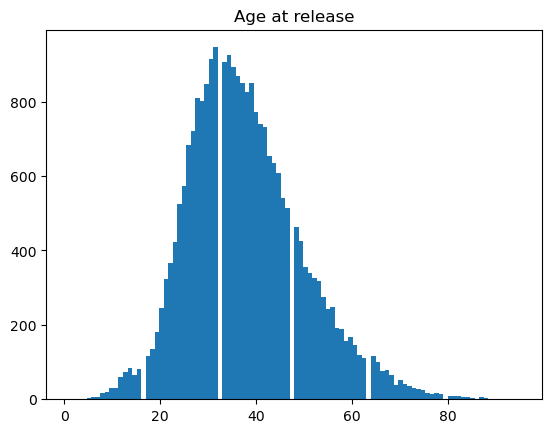

In [5]:
plt.hist(actors['Features']['age_at_release'].dropna(), bins=100)

plt.title('Age at release')
plt.show()




Text(0.5, 1.0, 'Movie count')

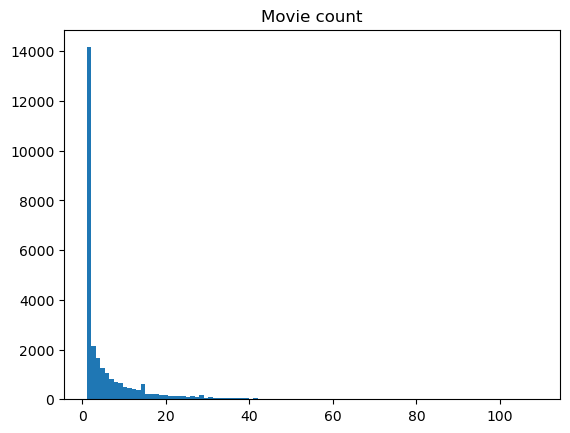

In [17]:
plt.hist(actors['Features']['movie_count'].dropna(), bins=100)

plt.title('Movie count')

Text(0.5, 1.0, 'Movie count in drama')

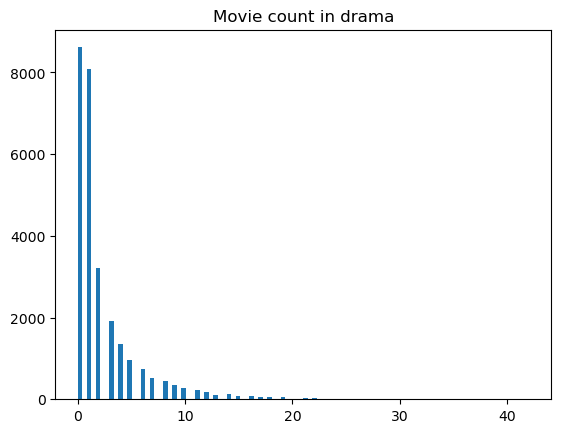

In [18]:
plt.hist(actors['Features']['movie_count_genre'].dropna(), bins=100)

plt.title('Movie count in drama')

Text(0.5, 1.0, 'Number of nominations')

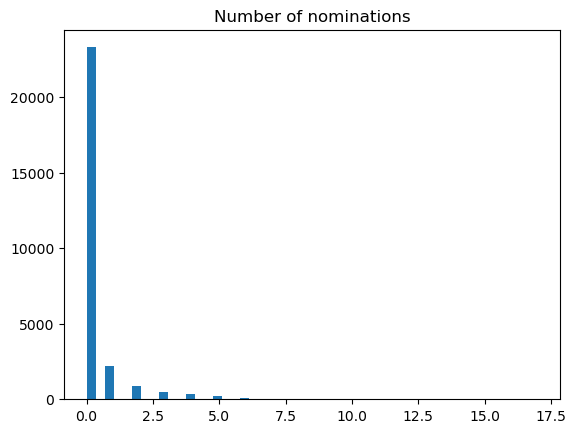

In [9]:
plt.hist(actors['Features']['nominations'].dropna(), bins=50)

plt.title('Number of nominations')

Text(0.5, 1.0, 'Number of awards')

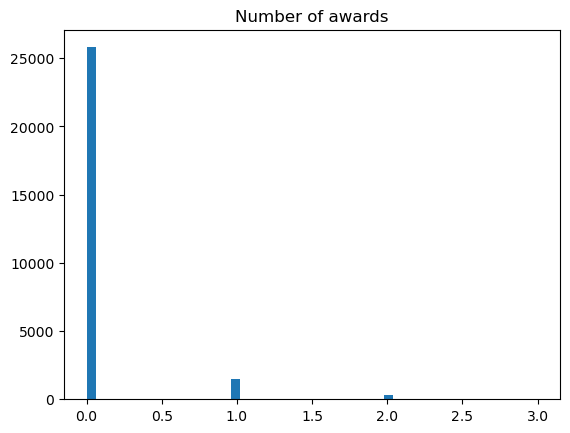

In [10]:
plt.hist(actors['Features']['awards'].dropna(), bins=50)

plt.title('Number of awards')

Text(0.5, 1.0, 'Diversity of genres')

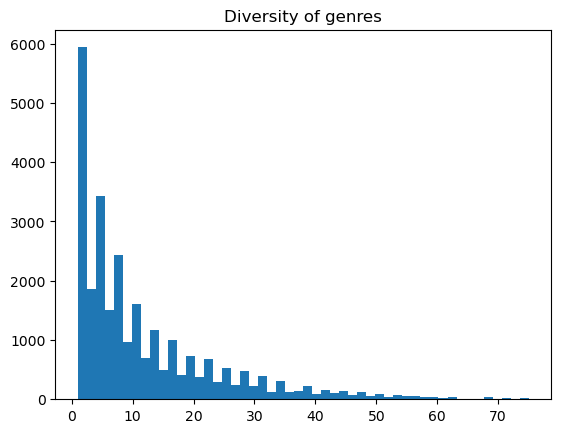

In [19]:
plt.hist(actors['Features']['genres_b4'].dropna(), bins=50)
plt.title('Diversity of genres')

Text(0.5, 1.0, 'Male')

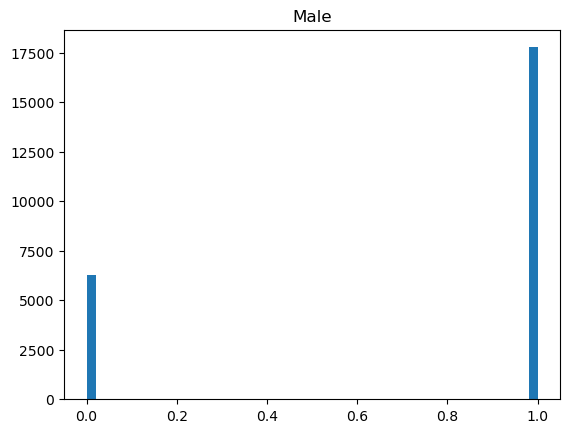

In [14]:
plt.hist(actors['Features']['isMale'].dropna(), bins=50)

plt.title('Male')

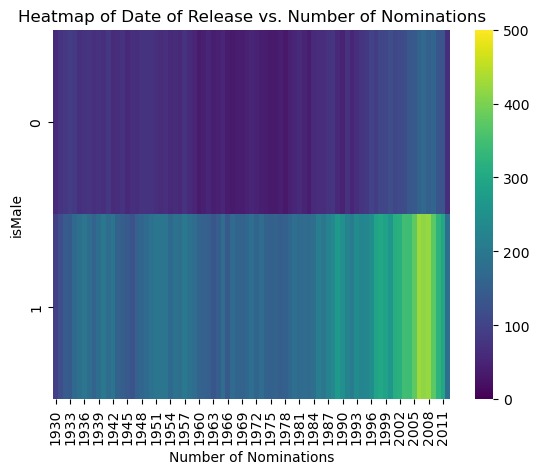

In [69]:

#data = actors.loc[:, ['age_at_release', 'movie_count']]

#sns.histplot(data = data, x='year', y='features', bins=(20, 20), cmap='viridis', cbar=True)
data = actors[['Info', 'Features']].dropna()

date_of_release = data['Info']['Movie release date']
number_of_nominations = data['Features']['isMale']

heatmap_data = data.pivot_table(index=number_of_nominations, columns=date_of_release, aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='g', cbar=True, vmin=0, vmax=500)
plt.title('Heatmap of Date of Release vs. Number of Nominations')
plt.xlabel('Number of Nominations')
plt.show()


       IMDb_ID    IMDb_actor_ID
0      tt0228333  nm0000449          25
1      tt0114508  nm0000449          20
2      tt0120841  nm0000449          20
3      tt0129884  nm0000449          20
4      tt0244196  nm0000449          25
                                   ... 
27617  tt0120514  nm0000410          40
27618  tt0100666  nm0056492          40
27619  tt0048223  nm0827409          60
27620  tt1606259  nm4774206        <NA>
27621  tt0362411  nm0514648          30
Name: Age range, Length: 27622, dtype: Int64

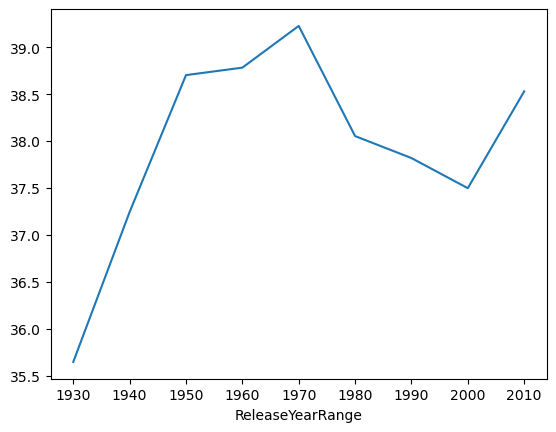

In [86]:
#mode_per_date = actors['Features']['age_at_release'].groupby(actors['Info']['Movie release date']).apply(lambda x: x.mode().iloc[0])
#mode_per_date.plot()

actors['ReleaseYearRange'] = (actors['Info']['Movie release date'] // 10) * 10


#mean_per_date = actors['Features']['age_at_release'].groupby(actors['Info']['Movie release date']).mean()
mean_per_date = actors['Features']['age_at_release'].groupby(actors['ReleaseYearRange']).mean()
mean_per_date.plot()


In [26]:

sns.heatmap(actors['Features']['age_at_release'].dropna(), annot=True, fmt="d") 

IndexError: Inconsistent shape between the condition and the input (got (25286, 1) and (25286,))